In [1]:
from measurement_plane.measurement_plane_client.MP_client import MeasurementPlaneClient
def display_capabilities_table(mpClient, max_width=75):
    """
    Retrieves and displays capabilities in a table format, wrapping long fields line-by-line.
    
    Parameters:
    - mpClient: Client instance to retrieve capabilities.
    - capability_type: Type of capability to filter by (default is "measure").
    - max_width: Maximum width per line for text fields to wrap.
    """
    capabilities = mpClient.get_capabilities()

    if capabilities:
        # Print table headers
        print(f"{'ID':<5} {'Endpoint':<20} {'Label':<40} {'Parameters Schema':<80} {'Result Schema':<80}")
        print("-" * 210)

        # Helper function to wrap text
        def wrap_text(text, width):
            return [text[i:i + width] for i in range(0, len(text), width)]
        
        # Print each capability row
        for c_id, cap in capabilities.items():
            # Get values and wrap long text fields
            endpoint_lines = wrap_text(str(cap.get('endpoint', 'N/A')), max_width)
            label_lines = wrap_text(str(cap.get('label', 'N/A')), max_width)
            parameters_schema_lines = wrap_text(str(cap.get('parameters_schema', 'N/A')), max_width)
            results_schema_lines = wrap_text(str(cap.get('resultSchema', 'N/A')), max_width)
            
            # Find maximum number of lines among the fields to align the row height
            max_lines = max(len(endpoint_lines), len(label_lines), len(parameters_schema_lines), len(results_schema_lines))
            
            # Print each line of the wrapped text fields
            for i in range(max_lines):
                c_id_display = str(c_id) if i == 0 else ""  # Display ID only in the first line
                endpoint_display = endpoint_lines[i] if i < len(endpoint_lines) else ""
                label_display = label_lines[i] if i < len(label_lines) else ""
                parameters_display = parameters_schema_lines[i] if i < len(parameters_schema_lines) else ""
                results_display = results_schema_lines[i] if i < len(results_schema_lines) else ""
                
                # Print each row with formatted spacing
                print(f"{c_id_display:<5} {endpoint_display:<20} {label_display:<40} {parameters_display:<80} {results_display:<80}")
            
            # Add a separator line after each entry for readability
            print("-" * 210)
    else:
        print("No available capabilities")
    return capabilities

def on_result_callback(result):
    try:
        print("wr_time is : ", result[0]["wr_time"])
        print("histo_vals is : ", result[0]["histo_vals"])
        print("bin_edges is : ", result[0]["bin_edges"])
        print("peak is : ", result[0]["peak"])
    except Exception as e:
        print(f"Error {e}")

BROKER_URL = "http://localhost:5672/"

mpClient = MeasurementPlaneClient(BROKER_URL)
    

In [3]:
# Example usage:
capabilities = display_capabilities_table(mpClient)
# Step 2: Chose the desired capability by it's id
capability_id = "323e2d44872dacc9f10c7fd18f11e775b0f60ca875e8f45dd3f46e4e25f0ffce"
capability = capabilities[capability_id]

ID    Endpoint             Label                                    Parameters Schema                                                                Result Schema                                                                   
------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
323e2d44872dacc9f10c7fd18f11e775b0f60ca875e8f45dd3f46e4e25f0ffce /coincidences_analyzer Coincidence Analysis Capability          {'type': 'object', 'properties': {'channels': {'type': 'array', 'items': {'      {'type': 'object', 'properties': {'histo_vals': {'type': 'array', 'items':      
                                                                    type': 'object', 'properties': {'channel': {'type': 'string', 'description'      {'type': 'number'}, 'description': 'Histogram values'}, 'bin_edges': {'type     
                                      

In [54]:
# Step 3: Instantiate a specification of a measurement from the capability
measurement = mpClient.create_measurement(capability)
print(f"Created Measurement: {measurement.specification_message}")

# Step 4: Configure the measurement with parameters
channels =  [{"channel":'3',"endpoint":"/tt/Bob"}, {"channel":'2',"endpoint":"/tt/Alice"}]
peak0 = 0
range_ns = 10
bins = 100
schedule = "now||stream"
parameters = {
    "channels": channels,
    "peak0":peak0,
    "bins":bins,
    "range_ns":range_ns
    
}
measurement.configure(
    schedule=schedule,
    parameters=parameters,
    result_callback=on_result_callback,  # Callback function for new results
)
print(f"Configured Measurement Specification: {measurement.specification_message}")

# Step 5: Send the Measurement
mpClient.send_measurement(measurement)

Created Measurement: {'label': 'Coincidence Analysis Capability', 'endpoint': '/coincidences_analyzer', 'capabilityName': 'coincidence_analysis_capability', 'parameters_schema': {'type': 'object', 'properties': {'channels': {'type': 'array', 'items': {'type': 'object', 'properties': {'channel': {'type': 'string', 'description': 'Channel identifier'}, 'endpoint': {'type': 'string', 'description': 'Endpoint of the channel'}}, 'required': ['channel', 'endpoint']}, 'minItems': 2, 'maxItems': 2, 'description': 'An array of two objects, each defining a channel and its endpoint'}, 'peak0': {'type': 'number', 'description': 'Initial offset in picoseconds applied to the data'}, 'range_ns': {'type': 'number', 'description': 'Range for the analysis in nanoseconds'}, 'bins': {'type': 'integer', 'description': 'Number of bins for the histogram'}}, 'required': ['channels', 'peak0', 'range_ns', 'bins']}, 'resultSchema': {'type': 'object', 'properties': {'histo_vals': {'type': 'array', 'items': {'type

wr_time is :  1488652.0
histo_vals is :  [1, 0, 0, 1, 0, 1, 0, 1, 2, 2, 4, 9, 14, 15, 29, 42, 79, 98, 175, 218, 269, 460, 598, 870, 849, 1313, 1645, 1635, 2494, 3124, 3740, 3683, 5417, 6582, 6323, 9217, 11042, 10308, 14841, 16915, 19043, 17140, 23688, 26409, 23325, 31237, 33578, 35838, 30696, 40781, 42178, 34544, 43557, 43649, 43046, 33152, 40575, 38874, 29459, 34343, 31600, 28487, 20642, 23295, 20772, 14690, 16086, 13824, 9649, 10371, 8862, 7389, 4990, 4988, 3959, 2484, 2546, 2101, 1666, 1005, 994, 697, 406, 394, 269, 239, 135, 114, 58, 42, 47, 28, 18, 3, 5, 1, 1, 1, 0, 1]
bin_edges is :  [-2238.8662109375, -2234.1564923095702, -2229.4467736816405, -2224.7370550537107, -2220.0273364257814, -2215.3176177978517, -2210.607899169922, -2205.898180541992, -2201.1884619140624, -2196.4787432861326, -2191.7690246582033, -2187.0593060302735, -2182.349587402344, -2177.639868774414, -2172.9301501464843, -2168.2204315185545, -2163.510712890625, -2158.8009942626954, -2154.0912756347657, -2149.38155

In [58]:
# Step 6: Interrupt the measurement
mpClient.interrupt_measurement(measurement)
print(f"Measurement Interrupted")

Measurement Interrupted


In [111]:
data_store
import pickle
with open('data_store.pkl', 'wb') as file:
    pickle.dump(data_store, file)


NameError: name 'data_store' is not defined

In [5]:
import pickle
# Load the data
with open('data_store.pkl', 'rb') as file:
    retreived_data = pickle.load(file)

In [7]:
retreived_data
len(retreived_data[2])

12

In [9]:
data_store[2]


{613091.0: array([6.49066004e+03, 2.18756371e+04, 3.72657677e+04, ...,
        1.53845846e+10, 1.53846000e+10, 1.53846153e+10]),
 613092.0: array([9.98115624e+05, 1.99800014e+06, 2.99785766e+06, ...,
        9.99997571e+11, 9.99998571e+11, 9.99999571e+11]),
 613093.0: array([5.71421008e+05, 1.57141252e+06, 2.57142003e+06, ...,
        9.99997142e+11, 9.99998142e+11, 9.99999141e+11]),
 613094.0: array([1.40964614e+05, 1.14116711e+06, 2.14140061e+06, ...,
        9.99997716e+11, 9.99998716e+11, 9.99999716e+11]),
 613095.0: array([7.17106341e+05, 1.71700986e+06, 2.71715836e+06, ...,
        9.99997290e+11, 9.99998290e+11, 9.99999290e+11]),
 613096.0: array([2.90076744e+05, 1.29027924e+06, 2.29042575e+06, ...,
        9.99997866e+11, 9.99998866e+11, 9.99999866e+11]),
 613097.0: array([8.65768497e+05, 1.86573601e+06, 2.86598251e+06, ...,
        9.99997438e+11, 9.99998438e+11, 9.99999438e+11]),
 613098.0: array([4.37887951e+05, 1.43802246e+06, 2.43785998e+06, ...,
        9.99997011e+11, 9.

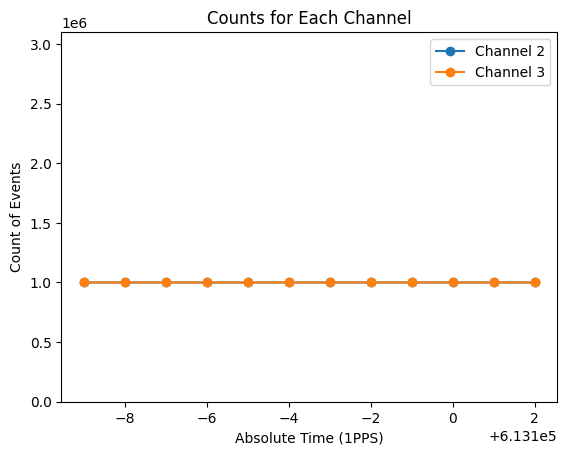

In [10]:
def plot_counts(data_store):
    plt.figure()
    plt.xlabel("Absolute Time (1PPS)")
    plt.ylabel("Count of Events")
    plt.title("Counts for Each Channel")
    plt.ylim(0, 3.1e6)
    # Iterate through each channel and add a bar plot for its counts
    for channel, time_data in data_store.items():
        counts = []
        abs_times = sorted(time_data.keys())
        # Calculate counts for each absolute time
        for abs_time in abs_times:
            counts.append(len(time_data[abs_time]))
        # Plot counts for the channel on the same figure with a label
        plt.plot(abs_times, counts, marker='o', linestyle='-',label=f"Channel {channel}")
    
    # Show legend to differentiate channels
    plt.legend()
    plt.show()

plot_counts(data_store)
